<h2> Long Short Term Momory (LSTM) Time Series Prediction of Spread of a Virus</h2>

<b> By Michael Kumakech</b>

In [114]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [115]:
df =pd.read_csv("train.csv", encoding ="latin1")
df.head()

,State,Confirmed,Discharged,Death,Date
0,FCT_Abuja,36,0,0,01/05/2020
1,FCT_Abuja,52,0,0,02/05/2020
2,FCT_Abuja,12,4,0,03/05/2020
3,FCT_Abuja,19,0,0,04/05/2020
4,FCT_Abuja,10,0,0,05/05/2020


In [116]:
df_processed = df.iloc[:, 1:2].values

<h2> Data Normalization</h2>

In [117]:
#from sklearn.preprocessing import MaxAbs
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()

df_scaled = scaler.fit_transform(df_processed)

<h2> Convert Training Data to Right Shape</h2>

In [118]:
features_set = []
labels = []
for i in range(60, 365):
    features_set.append(df_scaled[i-60:i, 0])
    labels.append(df_scaled[i, 0])

In [119]:
features_set, labels = np.array(features_set), np.array(labels)

In [120]:
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))

<h2> Training The LSTM</h2>

In [121]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [122]:
model = Sequential()

<h2> Creating LSTM and Dropout Layers</h2>

In [123]:
model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))

In [124]:
model.add(Dropout(0.2))

<b> Let's add three more LSTM and dropout layers to our model</b>

In [125]:
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

<h2> Creating Dense Layer</h2>

In [126]:
model.add(Dense(units = 1))

<h2>Model Compilation</h2>

In [127]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

<h2> Algorithm Training</h2>

In [128]:
model.fit(features_set, labels, epochs = 100, batch_size = 32)

Epoch 1/100
10/10 [==============================] - 369s 2s/step - loss: 0.0044
Epoch 2/100
10/10 [==============================] - 17s 2s/step - loss: 0.0034
Epoch 3/100
10/10 [==============================] - 16s 2s/step - loss: 0.0031
Epoch 4/100
10/10 [==============================] - 15s 1s/step - loss: 0.0027
Epoch 5/100
10/10 [==============================] - 15s 2s/step - loss: 0.0027
Epoch 6/100
10/10 [==============================] - 17s 2s/step - loss: 0.0030
Epoch 7/100
10/10 [==============================] - 20s 2s/step - loss: 0.0027
Epoch 8/100
10/10 [==============================] - 20s 2s/step - loss: 0.0030
Epoch 9/100
10/10 [==============================] - 15s 2s/step - loss: 0.0027
Epoch 10/100
10/10 [==============================] - 20s 2s/step - loss: 0.0026
Epoch 11/100
10/10 [==============================] - 22s 2s/step - loss: 0.0025
Epoch 12/100
10/10 [==============================] - 18s 2s/step - loss: 0.0026
Epoch 13/100
10/10 [================

<h2> Testing our LSTM</h2>

In [129]:
df_testing =pd.read_csv("test.csv", encoding ="latin1")
df_testing.head()

,State,Confirmed,Discharged,Death,Date
0,Kano,92,0,0,01/05/2020
1,Kano,2,7,3,02/05/2020
2,Kano,29,0,0,03/05/2020
3,Kano,23,0,2,04/05/2020
4,Kano,32,3,3,05/05/2020


In [130]:
df_testing_processed = df_testing.iloc[:, 1:2].values

<h2> Converting Test Data to Right Format</h2>

In [131]:
df_total = pd.concat((df['Death'], df_testing['Death']), axis=0)

In [132]:
test_inputs = df_total[len(df_total) - len(df_testing) - 60:].values

In [133]:
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)

In [134]:
test_features = []
for i in range(60, 365):
    test_features.append(test_inputs[i-60:i, 0])

In [135]:
test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))

<h2> Making Predictions</h2>

In [136]:
predictions = model.predict(test_features,)

10/10 [==============================] - 11s 108ms/step


In [137]:
predictions = scaler.inverse_transform(predictions)

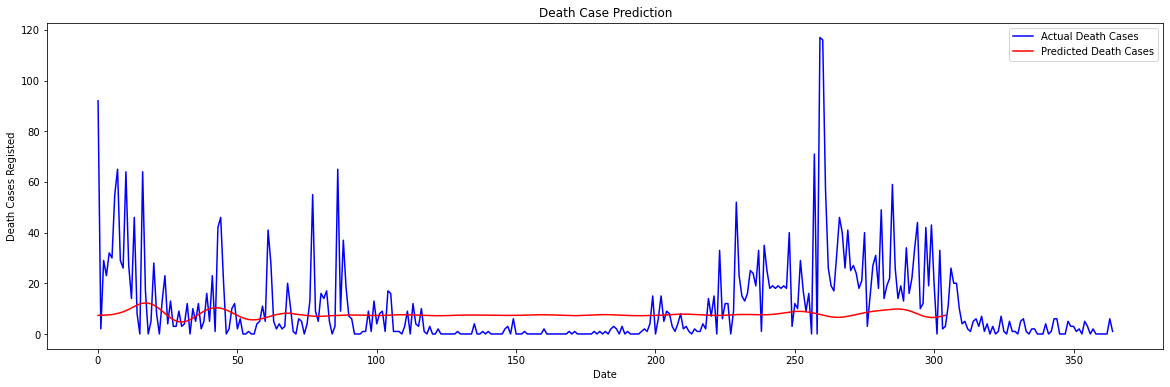

In [140]:
plt.figure(figsize=(20,6))
plt.plot(df_testing_processed, color='blue', label='Actual Death Cases')
plt.plot(predictions , color='red', label='Predicted Death Cases')
plt.title('Death Case Prediction')
plt.xlabel('Date')
plt.ylabel('Death Cases Registed')
plt.legend()
plt.show()

In [141]:
model.fit(test_features, labels, epochs = 100, batch_size = 32)

Epoch 1/100
10/10 [==============================] - 5s 570ms/step - loss: 0.0061
Epoch 2/100
10/10 [==============================] - 10s 917ms/step - loss: 0.0054
Epoch 3/100
10/10 [==============================] - 9s 875ms/step - loss: 0.0053
Epoch 4/100
10/10 [==============================] - 7s 553ms/step - loss: 0.0053
Epoch 5/100
10/10 [==============================] - 5s 474ms/step - loss: 0.0053
Epoch 6/100
10/10 [==============================] - 5s 528ms/step - loss: 0.0053
Epoch 7/100
10/10 [==============================] - 7s 550ms/step - loss: 0.0054
Epoch 8/100
10/10 [==============================] - 8s 872ms/step - loss: 0.0053
Epoch 9/100
10/10 [==============================] - 7s 718ms/step - loss: 0.0053
Epoch 10/100
10/10 [==============================] - 5s 517ms/step - loss: 0.0053
Epoch 11/100
10/10 [==============================] - 8s 899ms/step - loss: 0.0054
Epoch 12/100
10/10 [==============================] - 8s 888ms/step - loss: 0.0054
Epoch 13/100

In [31]:
#history = model.fit(test_features, labels, epochs = 100, batch_size = 32)

In [142]:
loss_val = model.evaluate(test_features,features_set)
y_pred = model.predict(test_features)
loss_val

10/10 [==============================] - 2s 127ms/step


0.005138951353728771

In [ ]:
history = model.fit(features_set, features_set, validation_data=(test_features,features_set), batch_size=32, epochs=100, verbose=1)

# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

Epoch 1/100
10/10 [==============================] - 87s 2s/step - loss: 0.0050 - val_loss: 0.0052
Epoch 2/100
10/10 [==============================] - 23s 2s/step - loss: 0.0047 - val_loss: 0.0052
Epoch 3/100
10/10 [==============================] - 24s 2s/step - loss: 0.0042 - val_loss: 0.0066
Epoch 4/100
10/10 [==============================] - 21s 2s/step - loss: 0.0038 - val_loss: 0.0079
Epoch 5/100
10/10 [==============================] - 24s 3s/step - loss: 0.0034 - val_loss: 0.0141
Epoch 6/100
10/10 [==============================] - 23s 2s/step - loss: 0.0033 - val_loss: 0.0140
Epoch 7/100
10/10 [==============================] - 23s 2s/step - loss: 0.0033 - val_loss: 0.0086
Epoch 8/100
10/10 [==============================] - 21s 2s/step - loss: 0.0032 - val_loss: 0.0089
Epoch 9/100
10/10 [==============================] - 22s 2s/step - loss: 0.0032 - val_loss: 0.0077
Epoch 10/100
10/10 [==============================] - 23s 2s/step - loss: 0.0032 - val_loss: 0.0079
Epoch 11/

In [ ]:
# Plot a graph of Accuracy Vs Epoch

<h2> CNN for Time Series Forecasting</h2>

In [94]:
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv1D
from keras.layers import MaxPooling1D

In [95]:
model2 = Sequential()
model2.add(Conv1D(filters=64, kernel_size=2, activation ='relu', input_shape=(features_set.shape[1], 1)))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Flatten())
#model2.add(Dense(100) #, activation ='relu')
model2.add(Dense(1))
model2.compile(optimizer='adam', loss='mse')
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 60, 50)            10400     
                                                                 
 dropout_4 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_7 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_5 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_8 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_6 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_9 (LSTM)               (None, 50)               

In [96]:
model2.fit(features_set, labels, epochs = 100, batch_size = 32)

Epoch 1/100
10/10 [==============================] - 5s 9ms/step - loss: 0.4413
Epoch 2/100
10/10 [==============================] - 0s 13ms/step - loss: 0.2588
Epoch 3/100
10/10 [==============================] - 0s 12ms/step - loss: 0.2085
Epoch 4/100
10/10 [==============================] - 0s 13ms/step - loss: 0.2093
Epoch 5/100
10/10 [==============================] - 0s 9ms/step - loss: 0.1888
Epoch 6/100
10/10 [==============================] - 0s 7ms/step - loss: 0.1781
Epoch 7/100
10/10 [==============================] - 0s 16ms/step - loss: 0.1733
Epoch 8/100
10/10 [==============================] - 0s 11ms/step - loss: 0.1655
Epoch 9/100
10/10 [==============================] - 0s 6ms/step - loss: 0.1618
Epoch 10/100
10/10 [==============================] - 0s 5ms/step - loss: 0.1557
Epoch 11/100
10/10 [==============================] - 0s 9ms/step - loss: 0.1543
Epoch 12/100
10/10 [==============================] - 0s 14ms/step - loss: 0.1490
Epoch 13/100
10/10 [===========

<h2> Prediction with CNN</h2>

In [97]:
predcnn = model2.predict(features_set, batch_size = 32)
print(predcnn)

10/10 [==============================] - 1s 17ms/step
[[-0.4143307 ]
 [-0.04894869]
 [ 0.08165147]
 [ 0.16010773]
 [ 0.3740436 ]
 [ 0.17336968]
 [-0.0452232 ]
 [-0.00512107]
 [-0.09163347]
 [-0.17672054]
 [ 0.06805032]
 [ 0.2827987 ]
 [ 0.18397644]
 [ 0.24375317]
 [ 0.21017572]
 [ 0.10898402]
 [ 0.24055652]
 [ 0.43651643]
 [ 0.41564587]
 [ 0.31160346]
 [ 0.24370606]
 [ 0.32848313]
 [ 0.23500937]
 [-0.0182039 ]
 [ 0.047224  ]
 [ 0.15434098]
 [-0.01231229]
 [-0.13147956]
 [-0.03603124]
 [ 0.0453502 ]
 [ 0.30390313]
 [ 0.3212678 ]
 [ 0.21880937]
 [ 0.15386334]
 [ 0.15540394]
 [ 0.17171016]
 [-0.05811676]
 [ 0.5160423 ]
 [ 0.4869263 ]
 [ 0.00392673]
 [-0.09494358]
 [-0.0525166 ]
 [ 0.18305875]
 [-0.05022325]
 [-0.2321648 ]
 [-0.02495362]
 [ 0.01355481]
 [-0.31110412]
 [-0.45388752]
 [-0.07019441]
 [ 0.17362374]
 [-0.06197844]
 [-0.05273374]
 [-0.17343609]
 [-0.35731843]
 [-0.224251  ]
 [-0.34453693]
 [-0.32504252]
 [-0.28187552]
 [-0.46560964]
 [-0.16245225]
 [-0.15442741]
 [-0.62299186]
 

In [98]:
loss_val_cnn = model2.evaluate(test_features,features_set)
y_pred = model2.predict(test_features)
loss_val_cnn

10/10 [==============================] - 0s 3ms/step


0.5181596279144287

In [99]:
model2.fit(test_features, labels, epochs = 100, batch_size = 32)

Epoch 1/100
10/10 [==============================] - 0s 8ms/step - loss: 0.4897
Epoch 2/100
10/10 [==============================] - 0s 11ms/step - loss: 0.4801
Epoch 3/100
10/10 [==============================] - 0s 13ms/step - loss: 0.4789
Epoch 4/100
10/10 [==============================] - 0s 6ms/step - loss: 0.4698
Epoch 5/100
10/10 [==============================] - 0s 14ms/step - loss: 0.4531
Epoch 6/100
10/10 [==============================] - 0s 12ms/step - loss: 0.4531
Epoch 7/100
10/10 [==============================] - 0s 6ms/step - loss: 0.4558
Epoch 8/100
10/10 [==============================] - 0s 9ms/step - loss: 0.4543
Epoch 9/100
10/10 [==============================] - 0s 18ms/step - loss: 0.4529
Epoch 10/100
10/10 [==============================] - 0s 24ms/step - loss: 0.4548
Epoch 11/100
10/10 [==============================] - 0s 21ms/step - loss: 0.4517
Epoch 12/100
10/10 [==============================] - 0s 22ms/step - loss: 0.4574
Epoch 13/100
10/10 [=========

Epoch 1/100
10/10 [==============================] - 6s 78ms/step - loss: 0.4530 - val_loss: 0.4607
Epoch 2/100
10/10 [==============================] - 1s 64ms/step - loss: 0.3393 - val_loss: 0.5347
Epoch 3/100
10/10 [==============================] - 1s 74ms/step - loss: 0.3070 - val_loss: 0.5335
Epoch 4/100
10/10 [==============================] - 1s 82ms/step - loss: 0.2934 - val_loss: 0.5208
Epoch 5/100
10/10 [==============================] - 0s 46ms/step - loss: 0.2854 - val_loss: 0.5295
Epoch 6/100
10/10 [==============================] - 1s 55ms/step - loss: 0.2812 - val_loss: 0.5410
Epoch 7/100
10/10 [==============================] - 1s 77ms/step - loss: 0.2787 - val_loss: 0.5724
Epoch 8/100
10/10 [==============================] - 0s 54ms/step - loss: 0.2740 - val_loss: 0.5709
Epoch 9/100
10/10 [==============================] - 1s 78ms/step - loss: 0.2722 - val_loss: 0.5905
Epoch 10/100
10/10 [==============================] - 1s 112ms/step - loss: 0.2708 - val_loss: 0.606

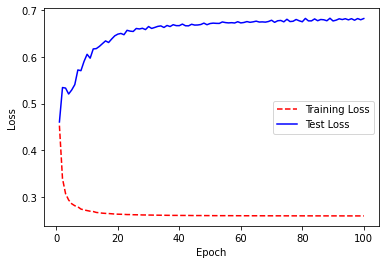

In [100]:
history = model2.fit(features_set, features_set, validation_data=(test_features,features_set), batch_size=32, epochs=100, verbose=1)

# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [ ]:
# Plot a graph of Accuracy Vs Epoch